In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from math import isnan
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

import warnings
warnings.filterwarnings('ignore')


In [2]:
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
country_df.shape

(167, 10)

In [5]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Cleaning the data

In [6]:
country_df.isnull().sum()
# there is no null values in any column 

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### EDA on the dataset

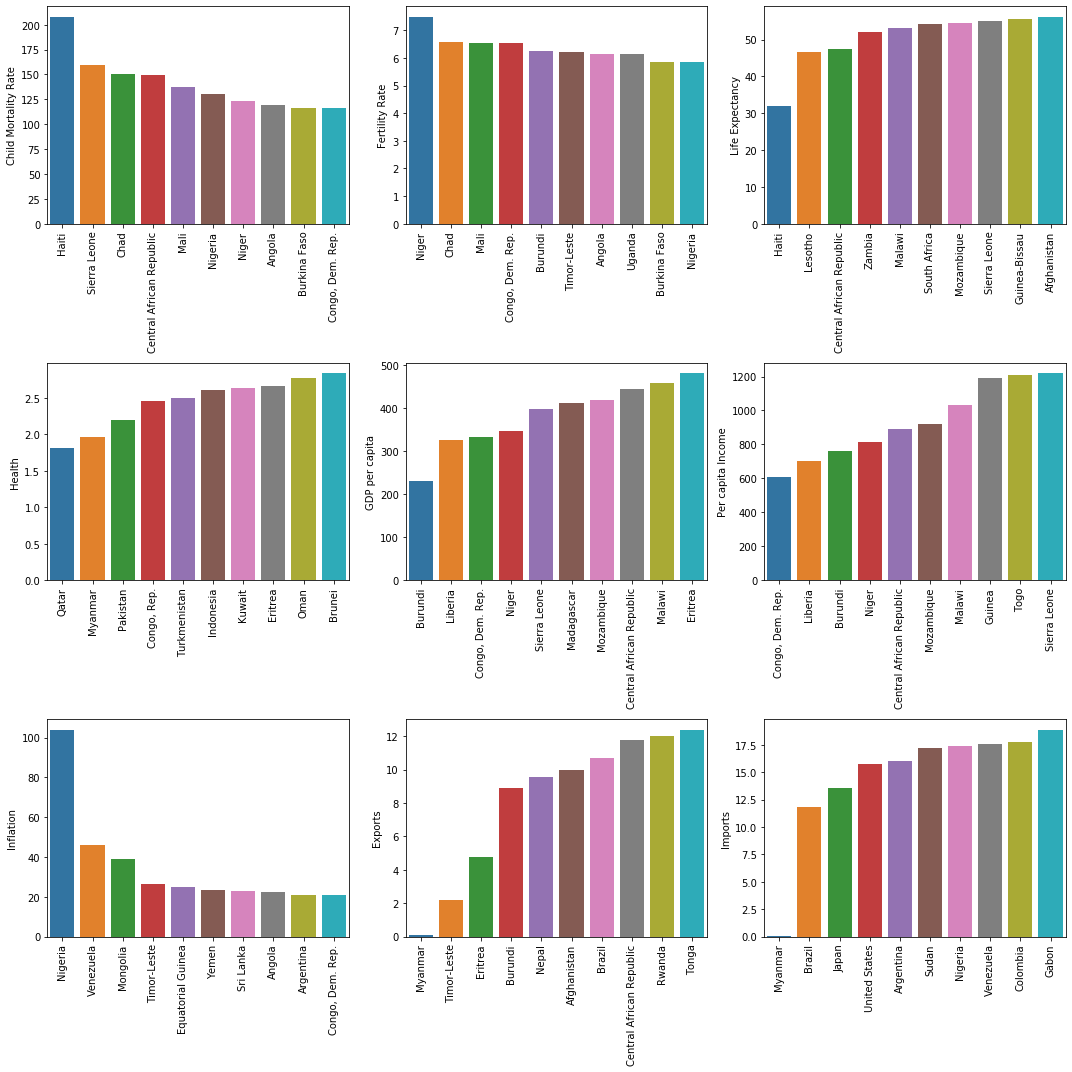

In [7]:


fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = country_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = country_df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = country_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = country_df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = country_df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = country_df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()
    



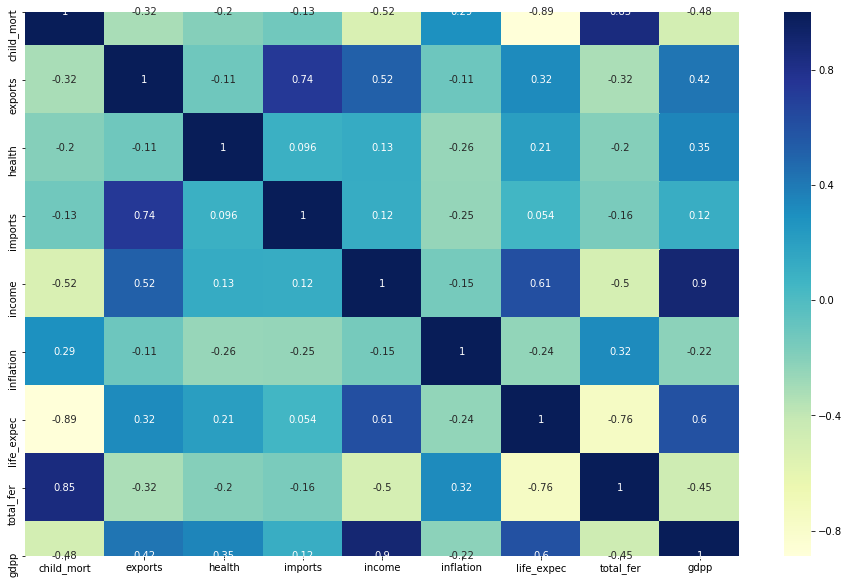

In [8]:
plt.figure(figsize = (16, 10))
sns.heatmap(country_df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('correlationplot')
plt.show()

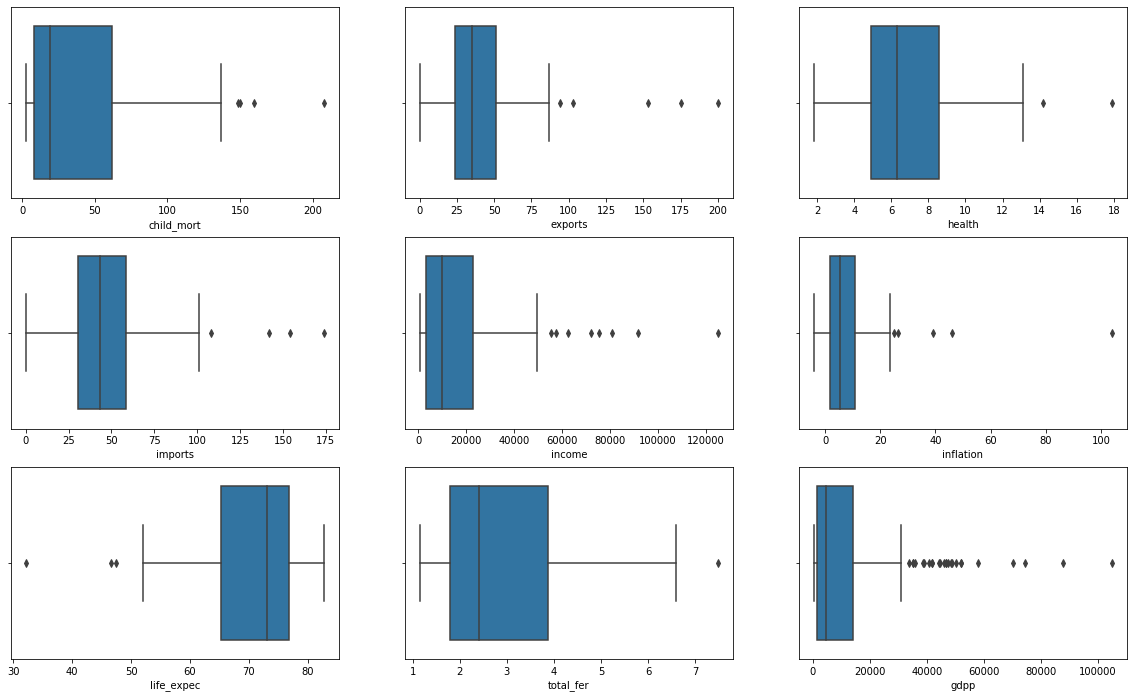

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(country_df.child_mort)
plt.subplot(3,3,2)
sns.boxplot(country_df.exports)
plt.subplot(3,3,3)
sns.boxplot(country_df.health)
plt.subplot(3,3,4)
sns.boxplot(country_df.imports)
plt.subplot(3,3,5)
sns.boxplot(country_df.income)
plt.subplot(3,3,6)
sns.boxplot(country_df.inflation)
plt.subplot(3,3,7)
sns.boxplot(country_df.life_expec)
plt.subplot(3,3,8)
sns.boxplot(country_df.total_fer)
plt.subplot(3,3,9)
sns.boxplot(country_df.gdpp)
plt.show()

In [10]:
#gdpp seems to have a lot of outliers
country_df.gdpp.describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

In [11]:
# exports, health and imports are given as percentage of GDP. Hence, to get the actual value of these quantities multiply these columns 
# by (GDP/100) or quantity =  0.01*percentagevalue *GDP


country_df['exports'] = country_df.exports.multiply(country_df.gdpp)
country_df['exports'] = country_df.exports.multiply(0.01)

country_df['health'] = country_df.health.multiply(country_df.gdpp)
country_df['health'] = country_df.health.multiply(0.01)

country_df['imports'] = country_df.imports.multiply(country_df.gdpp)
country_df['imports'] = country_df.imports.multiply(0.01)


In [12]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
country_df.gdpp.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     4660.0
0.70    11920.0
0.90    41840.0
0.95    48610.0
0.99    79088.0
Name: gdpp, dtype: float64

In [14]:
column = ['income', 'total_fer']

for i in column:
    q1 = country_df[i].quantile(0.95)
    country_df[i][country_df[i] >= q1] = q1




columns = ['imports', 'health', 'exports', 'gdpp']


for j in columns:
    q2 = country_df[j].quantile(0.90)
    country_df[j][country_df[j] >= q2] = q2




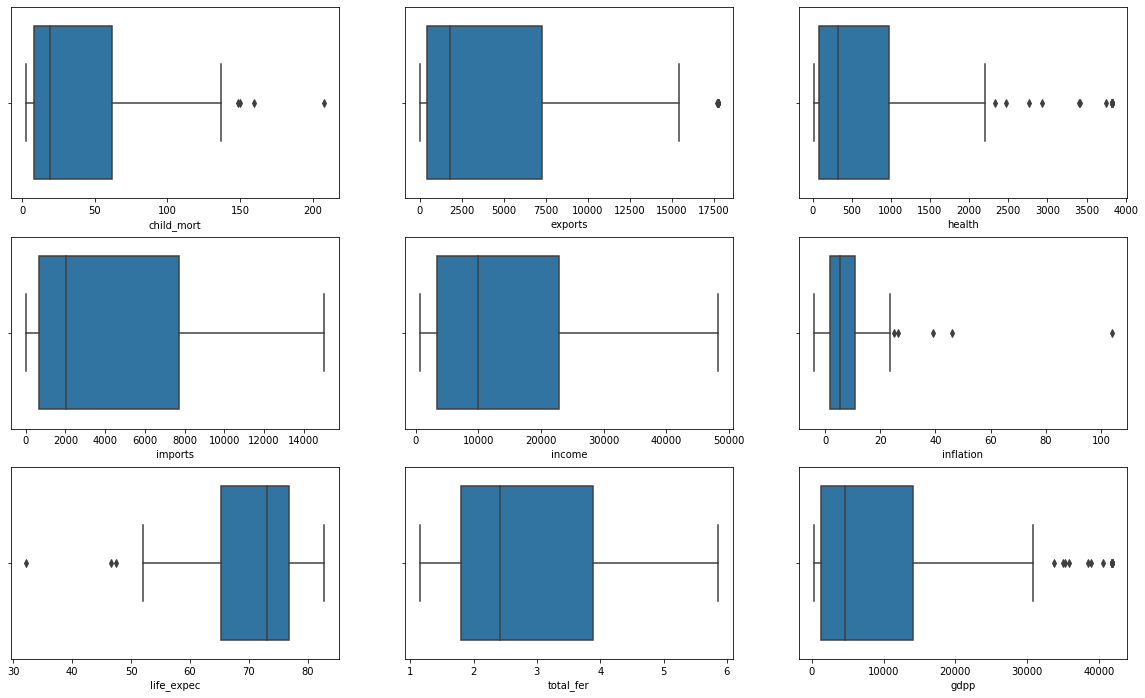

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(country_df.child_mort)
plt.subplot(3,3,2)
sns.boxplot(country_df.exports)
plt.subplot(3,3,3)
sns.boxplot(country_df.health)
plt.subplot(3,3,4)
sns.boxplot(country_df.imports)
plt.subplot(3,3,5)
sns.boxplot(country_df.income)
plt.subplot(3,3,6)
sns.boxplot(country_df.inflation)
plt.subplot(3,3,7)
sns.boxplot(country_df.life_expec)
plt.subplot(3,3,8)
sns.boxplot(country_df.total_fer)
plt.subplot(3,3,9)
sns.boxplot(country_df.gdpp)
plt.show()

In [16]:
li = list(country_df.columns)

In [17]:
li.remove('country')

In [18]:
rfm_df = country_df[li]
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 9)

In [19]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = li
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.797286,-0.676933,-0.841497,-0.958349,0.157336,-1.619092,2.016421,-0.786811
1,-0.538949,-0.611636,-0.490352,-0.493824,-0.394006,-0.312347,0.647866,-0.880535,-0.531304
2,-0.272833,-0.514980,-0.557985,-0.611211,-0.192552,0.789274,0.670423,-0.019090,-0.504576
3,2.007808,-0.432103,-0.628477,-0.588439,-0.667360,1.387054,-1.179234,2.044904,-0.571758
4,-0.695634,0.138833,-0.104136,0.545147,0.227992,-0.601749,0.704258,-0.547072,0.054549


## Hopkins test



In [20]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
hopkins(rfm_df)

# before scaling

0.8604532062910596

Hopkins value at around 80% or more gives us a sureity that this dataset is clusterable. In other words, higher is the percentage (>0.80) mean that the dataset can be expressed as clusters, or have the tendency to form clusters.

## K means

In [22]:
kmeans = KMeans(n_clusters=4, max_iter=50, random_state= 50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [23]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 3, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

## Finding optimal number of clusters

#### SSD or elbow curve 
Elbow curve is done to figure out the optimal number of clusters based on maximum intra-cluster distance and minimum intercluster distance (at the point of the elbow)


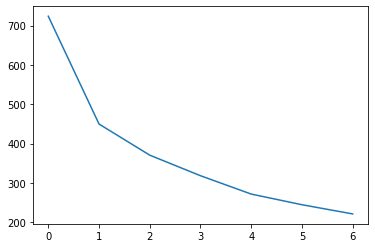

In [24]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

Here, the elbow seems to appear at index 1 (i.e. cluster = 3) and index 3(i.e. cluster = 5), Since, the value is only decreasing little between 3 and 5, 3 is chosen as the index

#### Silhouette analysis
Silhouette analysis gives the effectiveness of the cluster, and higher the value higher it can be chosen as cluster optimum

In [25]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5043582937163756
For n_clusters=3, the silhouette score is 0.45257440198807364
For n_clusters=4, the silhouette score is 0.4534362707903865
For n_clusters=5, the silhouette score is 0.3731643544353575
For n_clusters=6, the silhouette score is 0.32243431859661875
For n_clusters=7, the silhouette score is 0.30365906882923294
For n_clusters=8, the silhouette score is 0.3040848929213373


Here, we see that the maximum value occurs at 2. Clusters 3 and 4 have almost similar high values, right next to cluster = 2.
Since, 2 is usually not preferred for any business problems, 3 is chosen.

In [26]:
kmeans = KMeans(n_clusters=3, random_state= 50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [27]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [28]:
country_df['cluster_id'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0


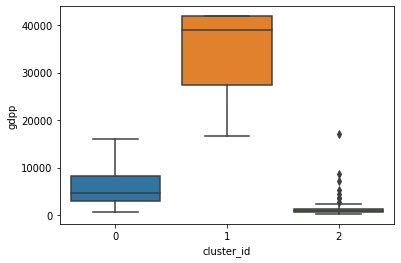

In [29]:
sns.boxplot(x='cluster_id', y='gdpp', data=country_df)

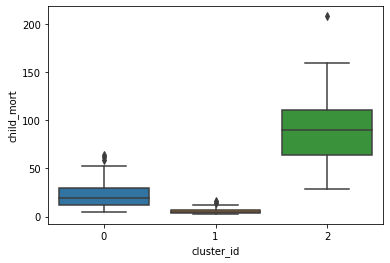

In [30]:
sns.boxplot(x='cluster_id', y='child_mort', data=country_df)

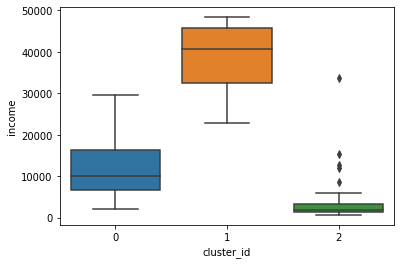

In [31]:
sns.boxplot(x='cluster_id', y='income', data=country_df)

In [32]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0


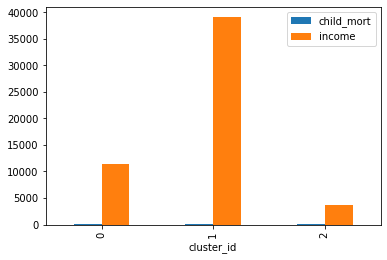

In [33]:
country_df.drop(['country', 'gdpp','exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

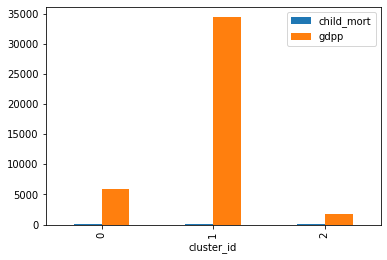

In [34]:
country_df.drop(['country', 'income','exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

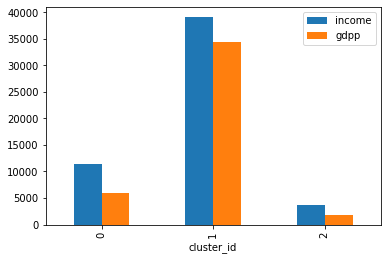

In [35]:
country_df.drop(['country', 'child_mort','exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

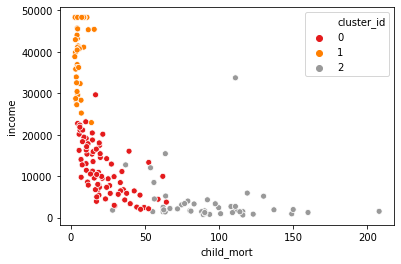

In [36]:
sns.scatterplot(x = 'child_mort', y = 'income' , hue = 'cluster_id' ,data = country_df, palette = 'Set1')

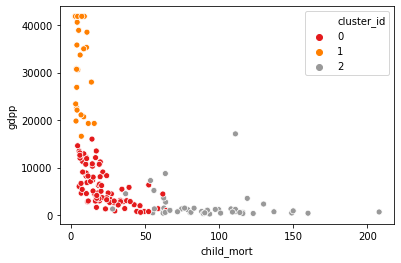

In [37]:
sns.scatterplot(x = 'child_mort', y = 'gdpp' , hue = 'cluster_id' ,data = country_df, palette = 'Set1')

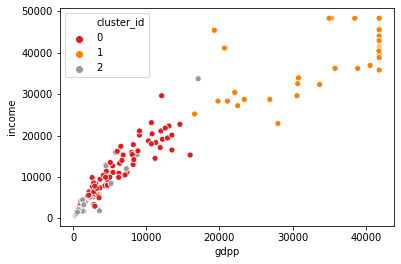

In [38]:
sns.scatterplot(x = 'gdpp', y = 'income' , hue = 'cluster_id' ,data = country_df, palette = 'Set1')

From the graphs above, 

## Heirarchical clustering

In [39]:
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.797286,-0.676933,-0.841497,-0.958349,0.157336,-1.619092,2.016421,-0.786811
1,-0.538949,-0.611636,-0.490352,-0.493824,-0.394006,-0.312347,0.647866,-0.880535,-0.531304
2,-0.272833,-0.514980,-0.557985,-0.611211,-0.192552,0.789274,0.670423,-0.019090,-0.504576
3,2.007808,-0.432103,-0.628477,-0.588439,-0.667360,1.387054,-1.179234,2.044904,-0.571758
4,-0.695634,0.138833,-0.104136,0.545147,0.227992,-0.601749,0.704258,-0.547072,0.054549


#### Single heirarchical clustering

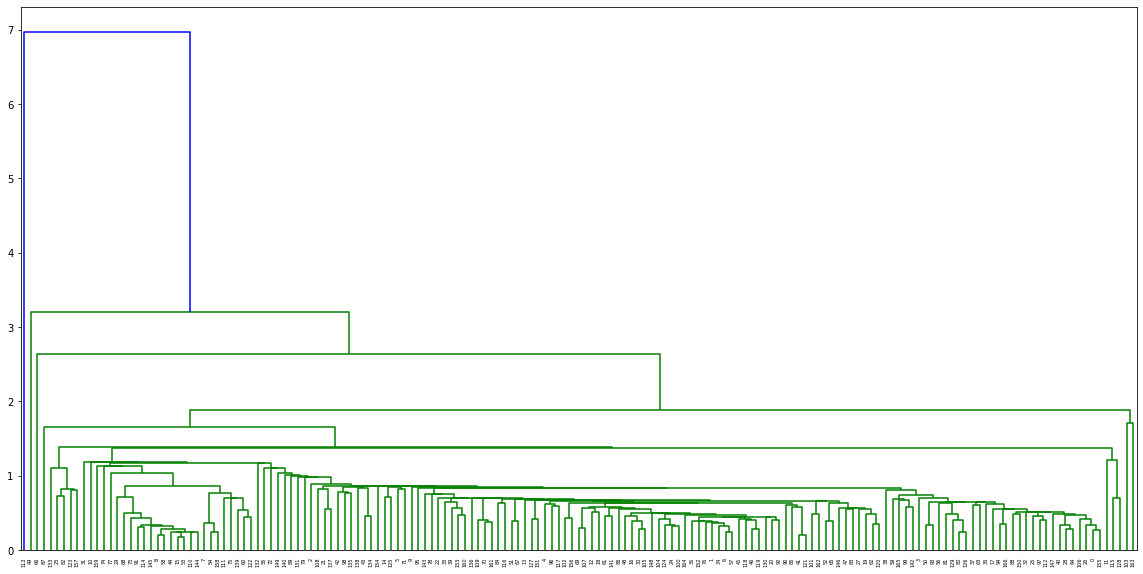

In [40]:
plt.figure(figsize = (20,10))
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Complete heirarchical clustering

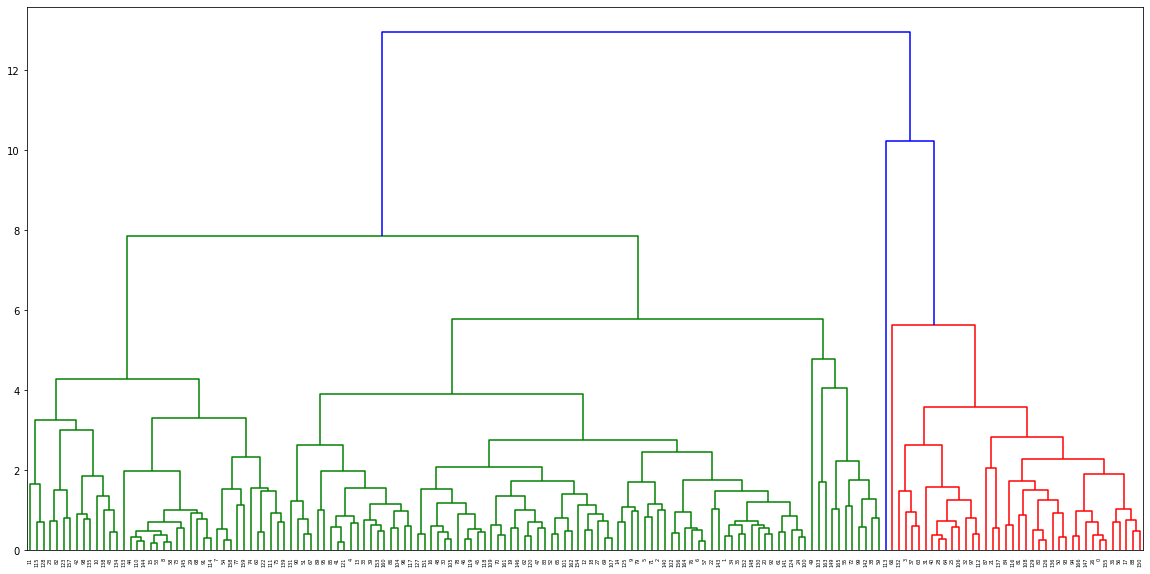

In [41]:
plt.figure(figsize = (20,10))
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [42]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [43]:
country_df['hcluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,hcluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0,1


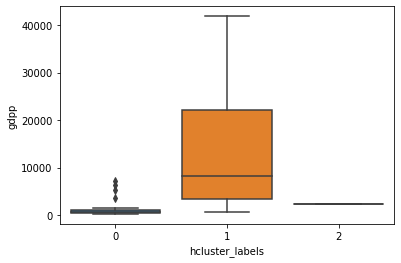

In [44]:
sns.boxplot(x='hcluster_labels', y='gdpp', data=country_df)

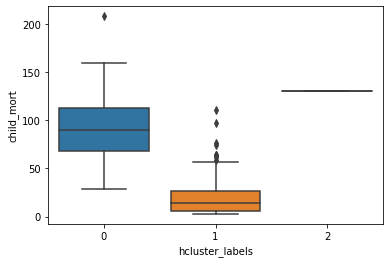

In [45]:
sns.boxplot(x='hcluster_labels', y='child_mort', data=country_df)

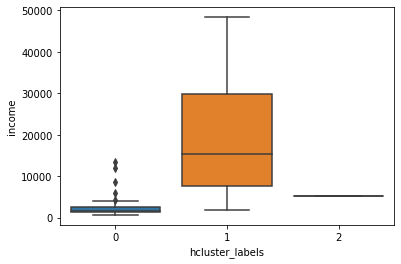

In [46]:
sns.boxplot(x='hcluster_labels', y='income', data=country_df)

In [47]:
country_df[country_df['cluster_id'] == 2 ].sort_values(by = ['income', 'child_mort','gdpp'], ascending = ['True', 'False', 'True']).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,hcluster_labels
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327,2,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.210,446,2,0


In [48]:
country_df[country_df['hcluster_labels'] == 0].sort_values(by = ['income', 'child_mort', 'gdpp'], ascending = ['True', 'False', 'True']).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,hcluster_labels
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327,2,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.210,446,2,0


It is found that some factors `income`, `child_mort`, `gdpp` or `inflation`, `life_expec` plays a vital role in deciding a socio-economic status of a country. Based on which, the decision to choose a country that requires an aid are also chosen. Note that the list of countries are bound to change based on clustering method, linkages, number of clusters chosen, etc. 

#### List of the countries are -
1. Congo, Dem. Rep
2. Liberia
3. Burundi
4. Niger
5. Central African Republic